In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
from scipy.stats import binned_statistic

In [4]:
match = np.genfromtxt('photUtils0820/HOROLOGIUM-I_aperPuMatch_pU_cut.dat',\
                      names=True)

In [5]:
len(match)

1521

In [6]:
g_idx = np.logical_and(match['m606c']>12,match['m814c']>12)
match_g = match[g_idx]

In [7]:
han_i = match_g['magr_f814w']
han_v = match_g['magr_f606w']
aper_i = match_g['m814c']
aper_v = match_g['m606c']

aper_c = aper_v - aper_i
han_c = han_v - han_i

In [8]:
mean1 = np.mean(stats.sigmaclip(han_v-aper_v,4,4)[0])
median1 = np.median(stats.sigmaclip(han_v-aper_v,4,4)[0])

In [9]:
median2 = np.median(stats.sigmaclip(han_i-aper_i,4,4)[0])
median3 = np.median(stats.sigmaclip(han_c-aper_c,4,4)[0])

mean2 = np.mean(stats.sigmaclip(han_i-aper_i,4,4)[0])
mean3 = np.mean(stats.sigmaclip(han_c-aper_c,4,4)[0])

print(mean1,mean2,mean3)

-0.05808413853003475 -0.03962656692690192 -0.016238708415086726


In [10]:
mean1 = np.mean(han_v-aper_v)
mean2 = np.mean(han_i-aper_i)
mean3 = np.mean(han_c-aper_c)

print(mean1,mean2,mean3)

-0.07296741744925286 -0.05442521938700965 -0.018542198062243206


In [11]:
bin_means1, bin_edges1, binnum1= binned_statistic(aper_v, han_v-aper_v, \
                    bins=10, range=(19.5, 24.5),statistic='mean')
bin_width = (bin_edges1[1] - bin_edges1[0])
bin_cent1 = bin_edges1[1:] - bin_width/2

bin_means2, bin_edges2, binnum2= binned_statistic(aper_i, han_i-aper_i, \
                    bins=10, range=(19.5, 24.5),statistic='mean')

bin_width = (bin_edges2[1] - bin_edges2[0])
bin_cent2 = bin_edges2[1:] - bin_width/2

bin_means3, bin_edges3, binnum3= binned_statistic(aper_c, han_c-aper_c, \
                    bins=10, range=(-1,2.5),statistic='mean')

bin_width = (bin_edges3[1] - bin_edges3[0])
bin_cent3 = bin_edges3[1:] - bin_width/2

bin_means4, bin_edges4, binnum4= binned_statistic(aper_v, \
        han_v-aper_v, \
                    bins=10, range=(19.5,24.5),statistic='std')

bin_width = (bin_edges4[1] - bin_edges4[0])
bin_cent4 = bin_edges4[1:] - bin_width/2

bin_val4 = bin_means4/np.sqrt(len(aper_v))

bin_means5, bin_edges5, binnum5= binned_statistic(aper_i, \
        han_i-aper_i, \
                    bins=10, range=(19.5,24.5),statistic='std')

bin_width = (bin_edges5[1] - bin_edges5[0])
bin_cent5 = bin_edges5[1:] - bin_width/2

bin_val5 = bin_means5/np.sqrt(len(aper_i))

bin_means6, bin_edges6, binnum6= binned_statistic(aper_c, \
        han_c-aper_c, \
                    bins=10, range=(-1,2.5),statistic='std')

bin_width = (bin_edges6[1] - bin_edges6[0])
bin_cent6 = bin_edges6[1:] - bin_width/2

bin_val6 = bin_means6/np.sqrt(len(aper_c))

In [12]:
plt.rcParams['axes.grid'] = True

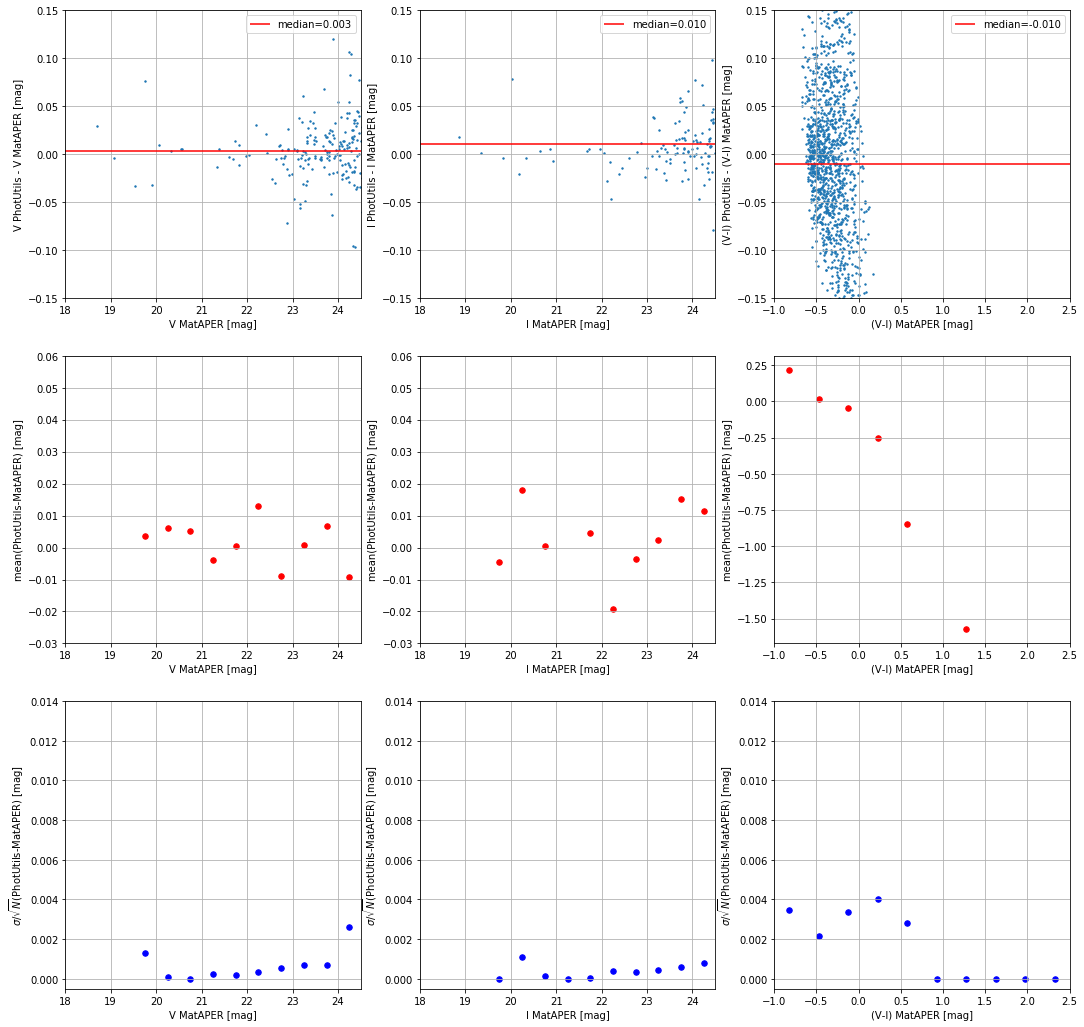

In [14]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = \
    plt.subplots(3,3,figsize=(18,18))

ax1.scatter(aper_v,han_v-aper_v,s=2)
ax1.set_xlim(18,24.5)
ax1.set_ylim(-0.15,0.15)
ax1.hlines(median1,18,29,color='red',label='median={0:.3f}'.format(median1))
ax1.set_ylabel('V PhotUtils - V MatAPER [mag]')
ax1.set_xlabel('V MatAPER [mag]')
ax1.legend()

ax2.scatter(aper_i,han_i-aper_i,s=2)
ax2.set_xlim(18,24.5)
ax2.set_ylim(-0.15,0.15)
ax2.hlines(median2,18,29,color='red',label='median={0:.3f}'.format(median2))
ax2.set_ylabel('I PhotUtils - I MatAPER [mag]')
ax2.set_xlabel('I MatAPER [mag]')
ax2.legend()

ax3.scatter(aper_c,han_c-aper_c,s=2)
ax3.set_xlim(-1,2.5)
ax3.set_ylim(-0.15,0.15)
ax3.hlines(median3,-1,2.5,color='red',label='median={0:.3f}'.format(median3))
ax3.set_ylabel('(V-I) PhotUtils - (V-I) MatAPER [mag]')
ax3.set_xlabel('(V-I) MatAPER [mag]')
ax3.legend()

ax4.scatter(bin_cent1,bin_means1,s=30,color='red')
ax4.set_xlim(18,24.5)
ax4.set_ylim(-0.03,0.06)
ax4.set_ylabel('mean(PhotUtils-MatAPER) [mag]')
ax4.set_xlabel('V MatAPER [mag]')

ax5.scatter(bin_cent2,bin_means2,s=30,color='red')
ax5.set_xlim(18,24.5)
ax5.set_ylim(-0.03,0.06)
ax5.set_ylabel('mean(PhotUtils-MatAPER) [mag]')
ax5.set_xlabel('I MatAPER [mag]')

ax6.scatter(bin_cent3,bin_means3,s=30,color='red')
ax6.set_xlim(-1,2.5)
# ax6.set_ylim(-0.03,0.06)
ax6.set_ylabel('mean(PhotUtils-MatAPER) [mag]')
ax6.set_xlabel('(V-I) MatAPER [mag]')

ax7.scatter(bin_cent4,bin_val4,s=30,color='blue')
ax7.set_xlim(18,24.5)
ax7.set_ylim(-0.0005,0.014)
ax7.set_xlabel('V MatAPER [mag]')
ax7.set_ylabel(r'$\sigma$/$\sqrt{N}$(PhotUtils-MatAPER) [mag]')

ax8.scatter(bin_cent5,bin_val5,s=30,color='blue')
ax8.set_xlim(18,24.5)
ax8.set_ylim(-0.0005,0.014)
ax8.set_xlabel('I MatAPER [mag]')
ax8.set_ylabel(r'$\sigma$/$\sqrt{N}$(PhotUtils-MatAPER) [mag]')

ax9.scatter(bin_cent6,bin_val6,s=30,color='blue')
ax9.set_xlim(-1,2.5)
ax9.set_ylim(-0.0005,0.014)
ax9.set_xlabel('(V-I) MatAPER [mag]')
ax9.set_ylabel(r'$\sigma$/$\sqrt{N}$(PhotUtils-MatAPER) [mag]')


# plt.show()
plt.savefig('photUtils0820/PhotUtilsMatAPER_allMatched.png',dpi=600,bbox_inches='tight')

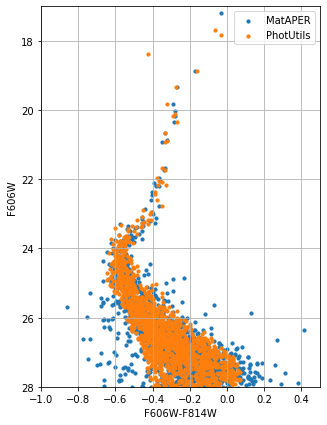

In [38]:
fig,ax = plt.subplots(figsize=(5,7))


ax.scatter(aper_c,aper_i,s=10,label='MatAPER')
ax.scatter(han_c,han_i,s=10,label='PhotUtils')

ax.set_xlim(-1.,0.5)
ax.set_ylim(28,17)

ax.set_xlabel('F606W-F814W')
ax.set_ylabel('F606W')

ax.legend()

plt.show()

In [31]:
y = match_g['m814c']-match_g['magr_f814w']
x = match_g['m814c']

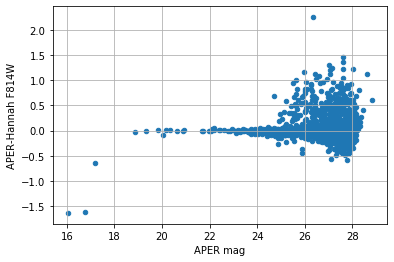

In [32]:
fig,ax = plt.subplots()

ax.scatter(x,y,s=20)

ax.set_ylabel('APER-Hannah F814W')
ax.set_xlabel('APER mag')

plt.show()

In [39]:
bkg = stats.sigmaclip(match_g['aper_bkg_f606w'],3.5,3.5)

In [43]:
min_b = np.min(bkg[0])
max_b = np.max(bkg[0])

In [44]:
use = np.logical_and(match_g['aper_bkg_f606w']>=min_b,match_g['aper_bkg_f606w']<=max_b)

In [48]:
mean,x_edges,y_edges, _ = stats.binned_statistic_2d(match_g['xcenter_f606w'][use],\
    match_g['ycenter_f606w'][use],match_g['aper_bkg_f606w'][use],statistic='mean',\
    bins=20,range=[[0,4096],[0,4096]])

In [49]:
cm = plt.cm.get_cmap('viridis')
#
bin_cent_y = (y_edges[1:] + y_edges[:-1])*0.5
bin_cent_x = (x_edges[1:] + x_edges[:-1])*0.5

extent=(np.min(bin_cent_x),np.max(bin_cent_x),np.min(bin_cent_y),np.max(bin_cent_y))

In [52]:
max_b

873.8762577667072

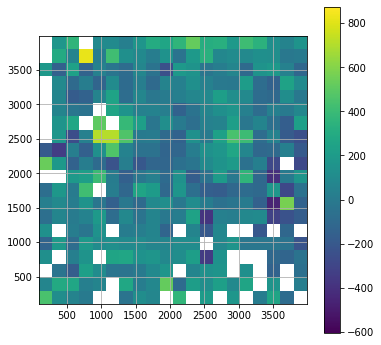

In [50]:
fig, ax = plt.subplots(figsize=(6,6))

cax = ax.imshow(mean.T,extent=extent,origin='lower',interpolation='nearest',\
                vmin=min_b,vmax=max_b,cmap=cm)
cbar = fig.colorbar(cax)


plt.show()

In [53]:
bkg = stats.sigmaclip(match_g['aper_bkg_f814w'],3.5,3.5)
min_b = np.min(bkg[0])
max_b = np.max(bkg[0])
use = np.logical_and(match_g['aper_bkg_f814w']>=min_b,match_g['aper_bkg_f814w']<=max_b)

In [54]:
mean,x_edges,y_edges, _ = stats.binned_statistic_2d(match_g['xcenter_f814w'][use],\
    match_g['ycenter_f814w'][use],match_g['aper_bkg_f814w'][use],statistic='mean',\
    bins=20,range=[[0,4096],[0,4096]])

In [55]:
cm = plt.cm.get_cmap('viridis')
#
bin_cent_y = (y_edges[1:] + y_edges[:-1])*0.5
bin_cent_x = (x_edges[1:] + x_edges[:-1])*0.5

extent=(np.min(bin_cent_x),np.max(bin_cent_x),np.min(bin_cent_y),np.max(bin_cent_y))

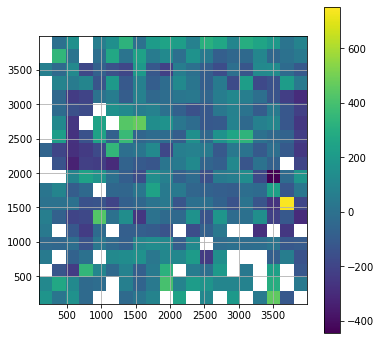

In [56]:
fig, ax = plt.subplots(figsize=(6,6))

cax = ax.imshow(mean.T,extent=extent,origin='lower',interpolation='nearest',\
                vmin=min_b,vmax=max_b,cmap=cm)
cbar = fig.colorbar(cax)


plt.show()

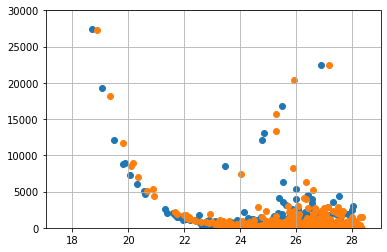

In [61]:
fig,ax = plt.subplots()

ax.scatter(match_g['magr_f606w'],match_g['aper_bkg_f606w'],label='F606W')
ax.scatter(match_g['magr_f814w'],match_g['aper_bkg_f814w'],label='F814W')

ax.set_ylim(0,30000)

plt.show()

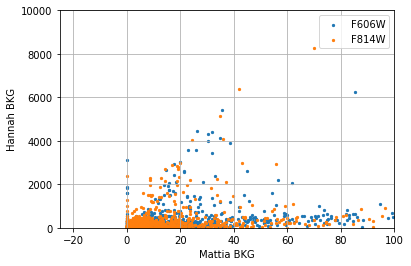

In [88]:
fig,ax = plt.subplots()

ax.scatter(match_g['sky606'],match_g['aper_bkg_f606w'],s=5,label='F606W')
ax.scatter(match_g['sky814'],match_g['aper_bkg_f814w'],s=5,label='F814W')

ax.set_xlim(-25,100)
ax.set_ylim(-0.1,10000)

ax.set_xlabel('Mattia BKG')
ax.set_ylabel('Hannah BKG')
ax.legend()

plt.show()

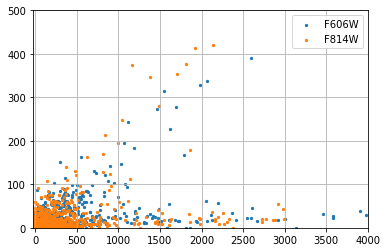

In [86]:
fig,ax = plt.subplots()

ax.scatter(match_g['aper_bkg_f606w'],match_g['sky606'],s=5,label='F606W')
ax.scatter(match_g['aper_bkg_f814w'],match_g['sky814'],s=5,label='F814W')

ax.set_xlim(-25,4000)
ax.set_ylim(-0.1,500)

ax.legend()
ax.set_ylabel('Mattia BKG')
ax.set_xlabel('Hannah BKG')

plt.show()

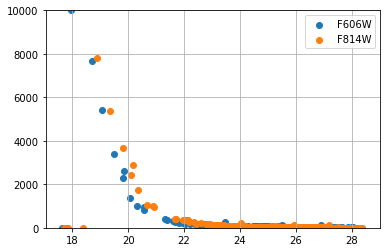

In [84]:
fig,ax = plt.subplots()

ax.scatter(match_g['magr_f606w'],match_g['sky606'],label='F606W')
ax.scatter(match_g['magr_f814w'],match_g['sky814'],label='F814W')

ax.legend()
ax.set_ylim(0,10000)

plt.show()

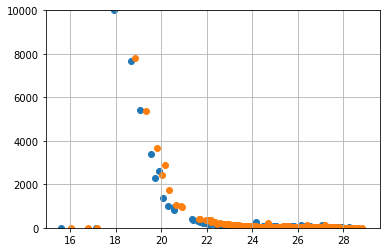

In [83]:
fig,ax = plt.subplots()

ax.scatter(match_g['m606c'],match_g['sky606'],label='F606W')
ax.scatter(match_g['m814c'],match_g['sky814'],label='F814W')

ax.set_ylim(0,10000)

plt.show()

In [ ]:
drc_diff = stats.sigmaclip(match_g['magrD']-match_g['magrF'],sigTol,sigTol)

min_diff = np.min(drc_diff[0])
max_diff = np.max(drc_diff[0])

magDiff = match_g['magrD']-match_g['magrF']
use = np.logical_and(magDiff>=min_diff,magDiff<=max_diff)

mean, x_edges, y_edges, _ = stats.binned_statistic_2d(match_g['xD'][use],match_g['yD'][use],magDiff[use],statistic='mean',bins=20,range=[[0,4096],[0,4096]])